# Importing Packages & Necessary Data

In [118]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import xgboost as xgb
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [44]:
df = pd.read_csv('data/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Data Preprocessing

In [45]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [46]:
df = df.drop_duplicates()

In [47]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Dropping Time, adding id

In [48]:
df = df.drop(columns='Time')

In [49]:
df['id'] = range(len(df))

In [50]:
df.set_index('id').reset_index()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283721,283721,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
283722,283722,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
283723,283723,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
283724,283724,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## EDA

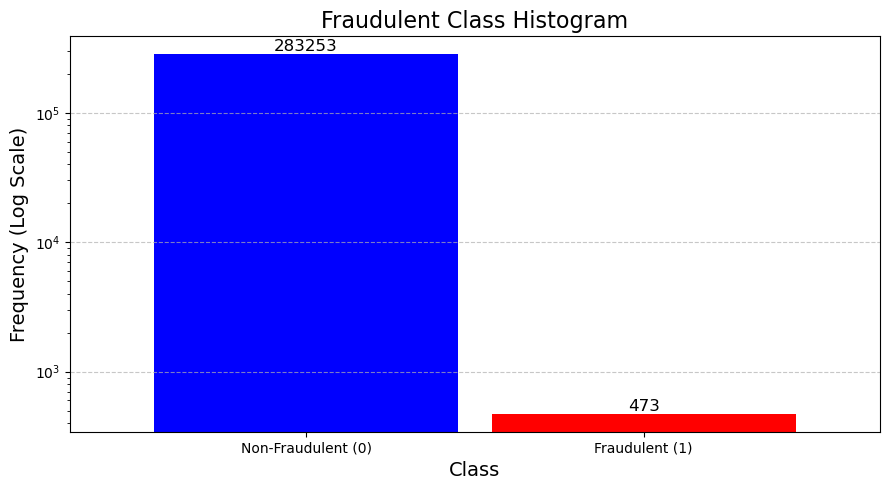

In [51]:
count_classes = pd.value_counts(df['Class'], sort=True).sort_index() #Histogram of counts of Class

# Create the plot
plt.figure(figsize=(9, 5))
count_classes.plot(kind='bar', width=0.9, color=['blue', 'red'])

plt.title("Fraudulent Class Histogram", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency (Log Scale)", fontsize=14)
plt.yscale('log')  # Use logarithmic scale
for index, value in enumerate(count_classes):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=12)
plt.xticks([0, 1], ['Non-Fraudulent (0)', 'Fraudulent (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [52]:
round(492/df.shape[0] * 100,3) #Percentage of Fraudulent Charges

0.173

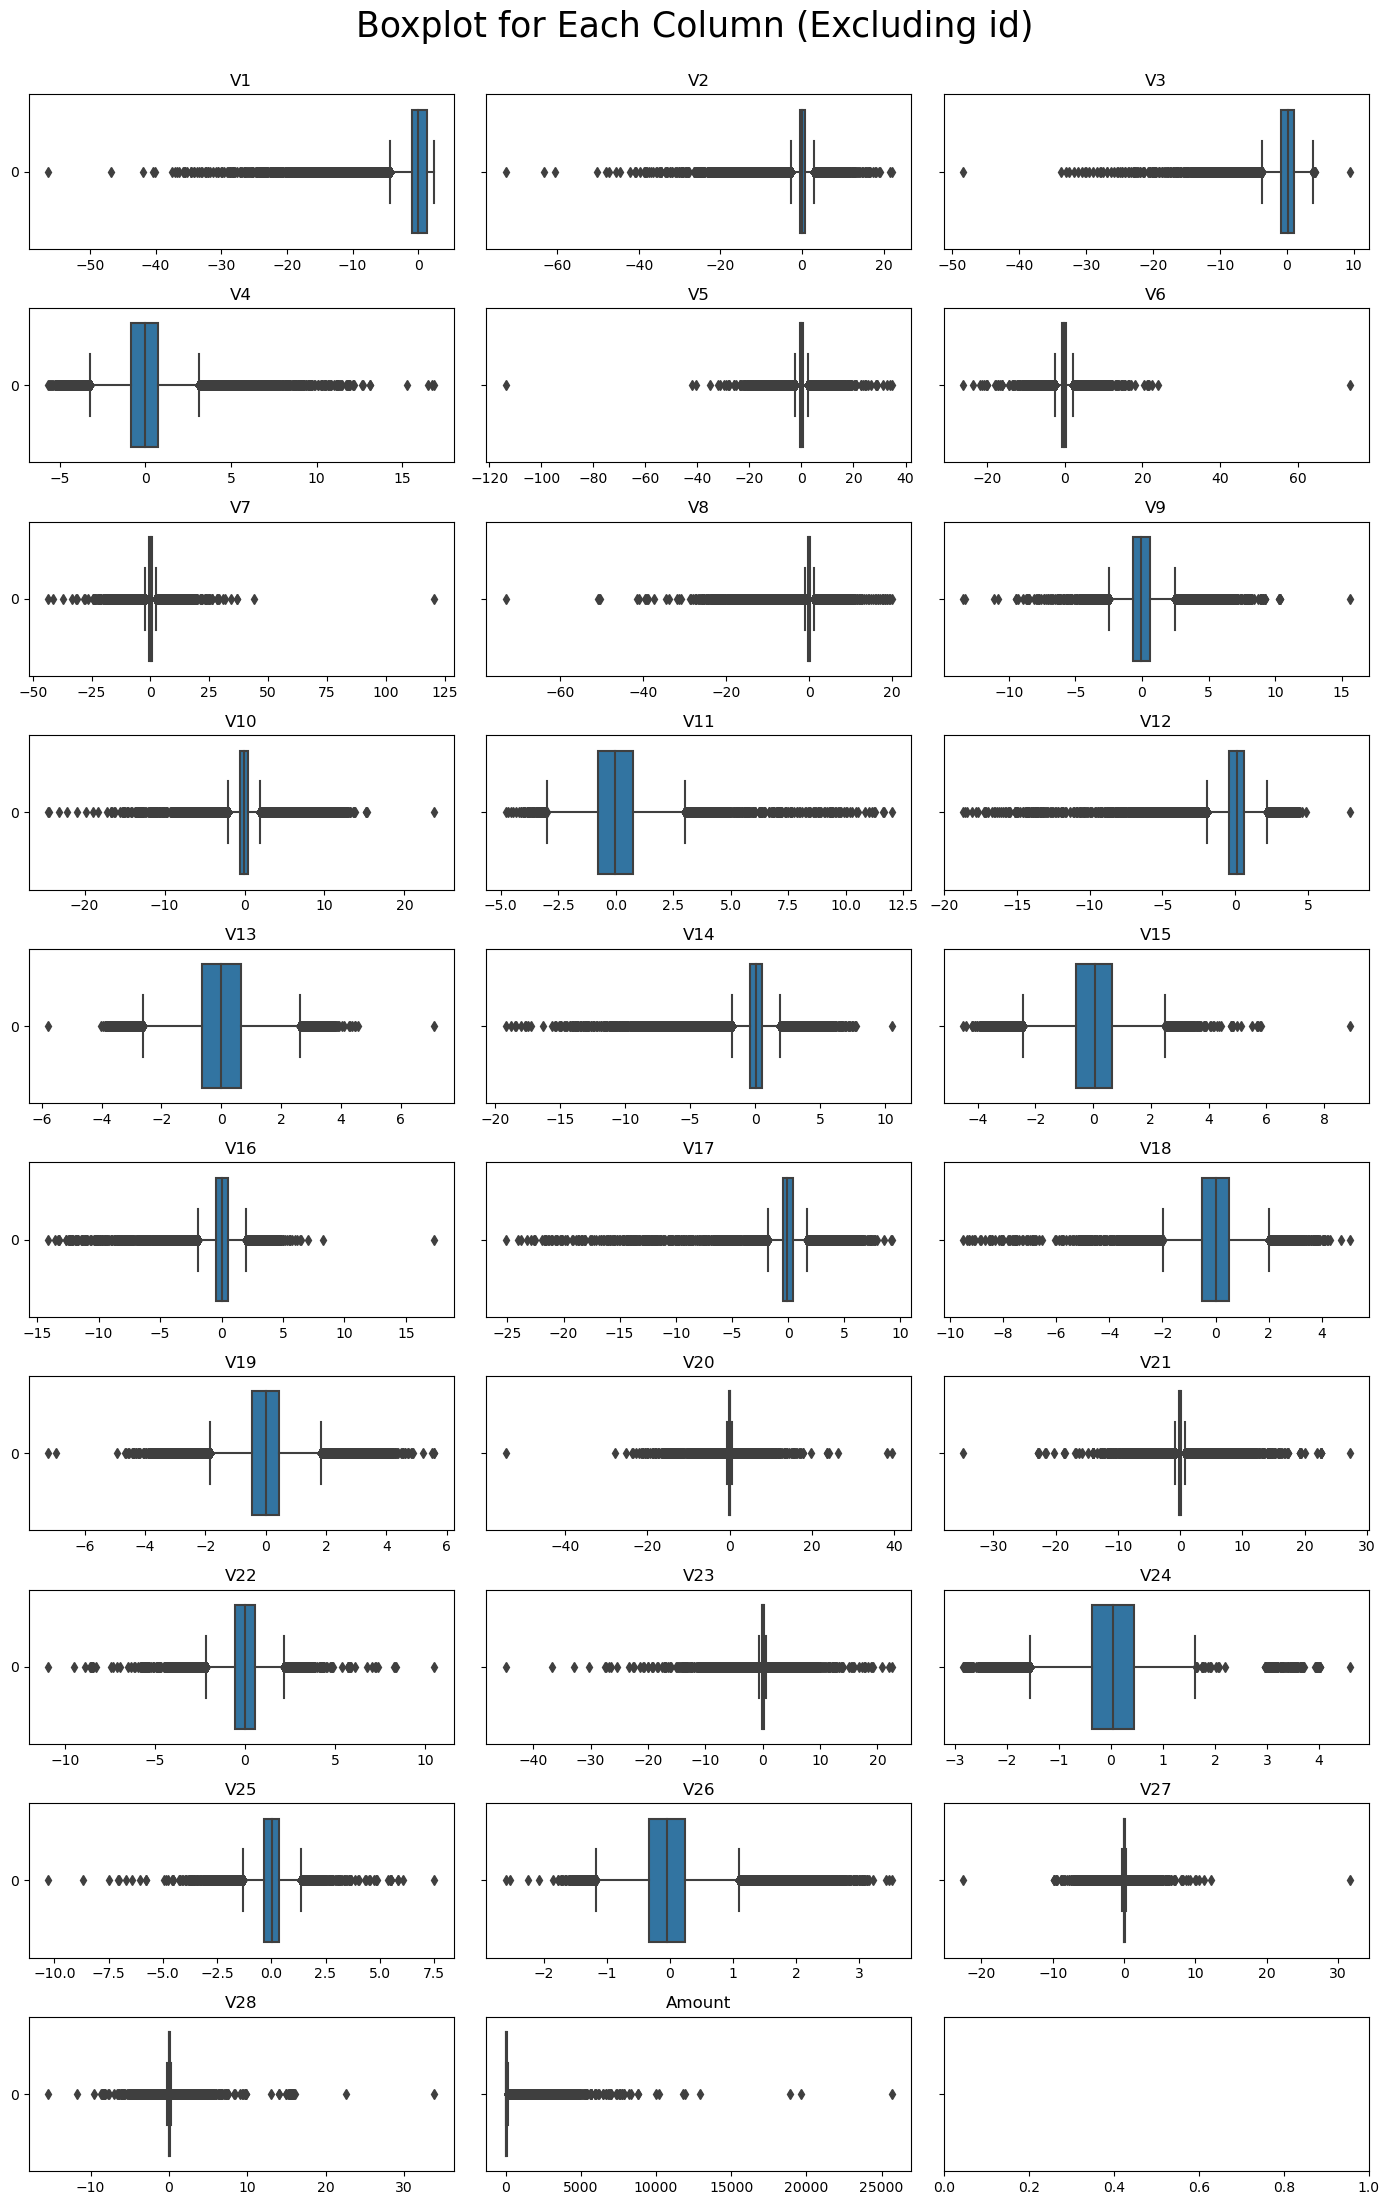

In [53]:
def boxplots_custom(dataset, columns_list, rows, cols, suptitle): #Boxplots for each column 
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(14,22))
    fig.suptitle(suptitle,y=1, size=25)
    axs = axs.flatten()
    for x, data in enumerate(columns_list):
        sns.boxplot(data=dataset[data], orient='h', ax=axs[x])
        axs[x].set_title(data)
        
boxplots_custom(dataset=df, columns_list=list(df.loc[:, 'V1':'Amount']), rows=10, cols=3, suptitle='Boxplot for Each Column (Excluding id)')
plt.tight_layout()

<Axes: title={'center': 'Correlated Features with Class'}>

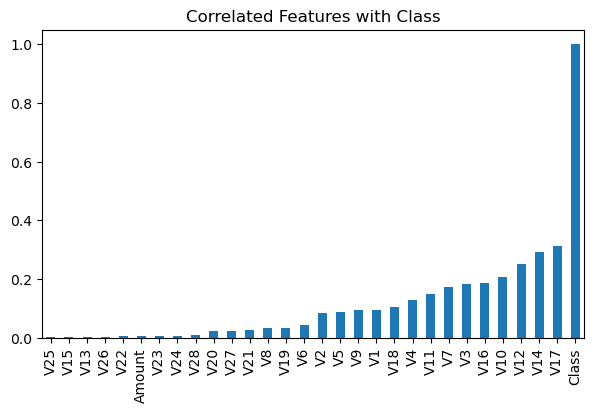

In [54]:
plt.figure(figsize=(7,4)) #Finding correlation amongst class
df.corr()['Class'][:-1].abs().sort_values().plot(kind='bar', title='Correlated Features with Class')

(31.5, -0.5)

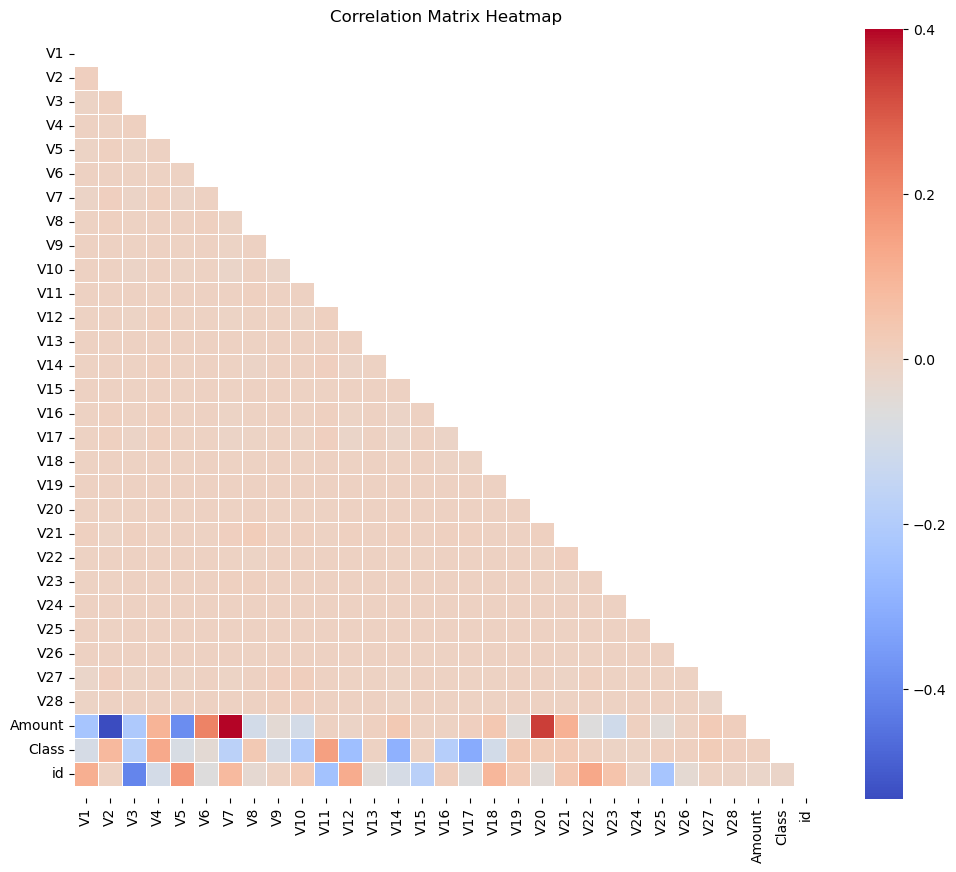

In [55]:
corr = df.corr() #heatmap for correlation among columns
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask,linewidths=.5, cmap='coolwarm', square=True)
plt.title('Correlation Matrix Heatmap')
plt.ylim(len(corr)+0.5, -0.5)


In [56]:
# Assuming 'corr_data' is the DataFrame containing the provided correlation values.
highest = corr[corr != 1]  # Exclude self-correlation

# Flatten the above DataFrame, sort by absolute value, exclude correlations less than 0.2
highest_flat = highest.unstack()
highest_flat_abs = highest_flat.abs()
sorted_corr = highest_flat_abs.sort_values(ascending=False)
high_corr_pairs = sorted_corr[sorted_corr > 0.2].drop_duplicates()
print(high_corr_pairs.dropna())


Amount  V2        0.533428
V3      id        0.406943
V7      Amount    0.400408
V5      Amount    0.387685
Amount  V20       0.340729
Class   V17       0.313498
        V14       0.293375
V12     Class     0.250711
id      V11       0.240524
V1      Amount    0.230105
V25     id        0.227875
Amount  V6        0.216389
V3      Amount    0.212410
Class   V10       0.206971
dtype: float64


## Predictive Task

In [57]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,id
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,1
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,2
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,3
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0,283721
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0,283722
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0,283723
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0,283724


In [58]:
df['normal_amount'] = StandardScaler().fit_transform(np.array(df['Amount']).reshape(-1, 1)) #Normalizing Amount Column
df = df.drop(columns='Amount')
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,id,normal_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0,0.244200
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1,-0.342584
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,2,1.158900
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,3,0.139886
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4,-0.073813


## Baseline Models

In [59]:
X = df.drop(['Class', 'id'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [60]:

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
recall_lr = recall_score(y_test, y_pred_lr)
print(f'Logistic Regression Recall: {recall_lr}')

Logistic Regression Recall: 0.5444444444444444


### Random Forest Classifier

In [61]:
random_forest = RandomForestClassifier(n_estimators=50, max_depth=6)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
recall_rf = recall_score(y_test, y_pred_rf)
print(f'Random Forest Recall: {recall_rf}')

Random Forest Recall: 0.6888888888888889


### XGBoost Classifier

In [62]:
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgboost_model.fit(X_train, y_train)
y_pred_xgb = xgboost_model.predict(X_test)
recall_xgb = recall_score(y_test, y_pred_xgb)
print(f'XGBoost Recall: {recall_xgb}')

XGBoost Recall: 0.7222222222222222


# Modeling

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

smote = SMOTE() # Applying SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

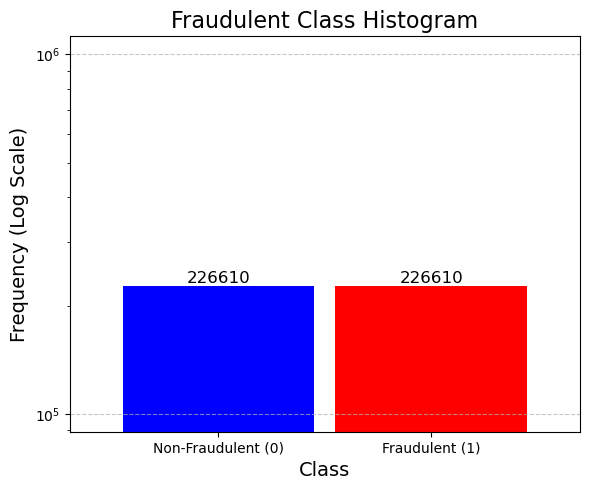

In [64]:
combined = pd.concat([X_train_smote, y_train_smote], axis=1)
count_classes = pd.value_counts(combined['Class'], sort=True).sort_index() #Histogram of counts of Class

# Create the plot
plt.figure(figsize=(6, 5))
count_classes.plot(kind='bar', width=0.9, color=['blue', 'red'])

plt.title("Fraudulent Class Histogram", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Frequency (Log Scale)", fontsize=14)
plt.yscale('log')  # Use logarithmic scale
for index, value in enumerate(count_classes):
    plt.text(index, value, f'{value}', ha='center', va='bottom', fontsize=12)
plt.xticks([0, 1], ['Non-Fraudulent (0)', 'Fraudulent (1)'], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [104]:
recall_scores = []

for _ in range(50):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgboost_model.fit(X_train_smote, y_train_smote)

    y_pred_xgb = xgboost_model.predict(X_test)
    recall = recall_score(y_test, y_pred_xgb)
    recall_scores.append(recall)

# Calculating the mean recall score across all iterations
mean_recall = np.mean(recall_scores)
print(f'Average XGBoost Recall on Original Test Set: {mean_recall}')

Average XGBoost Recall on Original Test Set: 0.8205751865510527


## Hyper Parameter Tuning

In [86]:
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}
hyper_tuned = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True)
grid_search = GridSearchCV(estimator=hyper_tuned, param_grid=param_grid, scoring='recall', cv=stratified_kfold, n_jobs=-1)
grid_search.fit(X_train_smote, y_train_smote)
print("Best parameters:", grid_search.best_params_)
print("Best recall in cross-validation:", grid_search.best_score_)
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
best_recall = recall_score(y_test, y_pred_best)

Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 300, 'subsample': 0.8}
Best recall in cross-validation: 1.0


In [112]:
import xgboost as xgb
from sklearn.metrics import recall_score
recall_scores_opt = []

for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    optimized_params = {
        'learning_rate': 0.1,
        'max_depth': 4,
        'n_estimators': 300,
        'subsample': 0.8,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    optimized_xgb_model = xgb.XGBClassifier(**optimized_params)
    optimized_xgb_model.fit(X_train_smote, y_train_smote)
    y_pred_optimized = optimized_xgb_model.predict(X_test)

    optimized_recall = recall_score(y_test, y_pred_optimized)

    recall_scores_opt.append(optimized_recall)

mean_recall_opt = np.mean(recall_scores_opt)
print(f'Average Optimized XGBoost Recall on Original Test Set over 50 runs: {mean_recall_opt}')

Average Optimized XGBoost Recall on Original Test Set over 50 runs: 0.8568201441377084


### Feature Selection

In [120]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
xgb_features = xgb.XGBClassifier(use_label_encoder=False)
rfe = RFE(estimator=xgb_features, n_features_to_select=5)
rfe.fit(X_train, y_train)
print("Features sorted by their rank:")
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), X.columns)))

Features sorted by their rank:
[(1, 'V10'), (1, 'V12'), (1, 'V14'), (1, 'V17'), (1, 'V7'), (2, 'V4'), (3, 'V16'), (4, 'V28'), (5, 'V1'), (6, 'V27'), (7, 'V26'), (8, 'normal_amount'), (9, 'V21'), (10, 'V8'), (11, 'V3'), (12, 'V2'), (13, 'V20'), (14, 'V6'), (15, 'V19'), (16, 'V18'), (17, 'id'), (18, 'V23'), (19, 'V13'), (20, 'V9'), (21, 'V11'), (22, 'V24'), (23, 'V22'), (24, 'V15'), (25, 'V5'), (26, 'V25')]


In [129]:
recall_scores = []
X = df[['V10', 'V12', 'V14', 'V17', 'V7']]
for _ in range(50):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgboost_model.fit(X_train_smote, y_train_smote)

    y_pred_xgb = xgboost_model.predict(X_test)
    recall = recall_score(y_test, y_pred_xgb)
    recall_scores.append(recall)

# Calculating the mean recall score across all iterations
mean_recall = np.mean(recall_scores)
print(f'Average XGBoost Recall on Original Test Set with Feature Selection: {mean_recall}')

Average XGBoost Recall on Original Test Set with Feature Selection: 0.8325959688307488


## Not quite the best, Let's use more features

In [130]:
recall_scores = []
X = df[['V10', 'V12', 'V14', 'V17', 'V7', 'V4', 'V16', 'V28', 'V1']]
for _ in range(50):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
    xgboost_model.fit(X_train_smote, y_train_smote)

    y_pred_xgb = xgboost_model.predict(X_test)
    recall = recall_score(y_test, y_pred_xgb)
    recall_scores.append(recall)

# Calculating the mean recall score across all iterations
mean_recall = np.mean(recall_scores)
print(f'Average XGBoost Recall on Original Test Set with 9 Feature Selection: {mean_recall}')

Average XGBoost Recall on Original Test Set with 9 Feature Selection: 0.834633449251792


## Final Model

In [134]:
import xgboost as xgb
from sklearn.metrics import recall_score
recall_scores_opt = []
X = df[['V10', 'V12', 'V14', 'V17', 'V7', 'V4', 'V16', 'V28', 'V1']]
for _ in range(50):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    smote = SMOTE()
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    optimized_params = {
        'learning_rate': 0.1,
        'max_depth': 4,
        'n_estimators': 300,
        'subsample': 0.8,
        'use_label_encoder': False,
        'eval_metric': 'logloss'
    }
    optimized_xgb_model = xgb.XGBClassifier(**optimized_params)
    optimized_xgb_model.fit(X_train_smote, y_train_smote)
    y_pred_optimized = optimized_xgb_model.predict(X_test)

    optimized_recall = recall_score(y_test, y_pred_optimized)
    recall_scores_opt.append(optimized_recall)

mean_recall_opt = np.mean(recall_scores_opt)
print(f'Average Optimized XGBoost Recall on Original Test Set over 50 runs: {mean_recall_opt}')

Average Optimized XGBoost Recall on Original Test Set over 50 runs: 0.8588657365671213
